In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/data4.csv')

In [4]:
df.head()

,Lifter Name,Age,Weight Class,Lift Type,Amount Lifted (kg)
0,Jessica Wilson,46,59 kg,Bench Press,269
1,John Doe,60,83 kg,Bench Press,179
2,Emily Davis,41,105 kg,Bench Press,235
3,Emily Davis,33,66 kg,Squat,359
4,Laura Taylor,56,74 kg,Deadlift,221


In [5]:
df.tail()

,Lifter Name,Age,Weight Class,Lift Type,Amount Lifted (kg)
2995,John Doe,46,74 kg,Bench Press,246
2996,Daniel Lee,39,Open,Deadlift,244
2997,Sarah Thomas,62,Open,Squat,148
2998,Chris Brown,32,93 kg,Bench Press,333
2999,Daniel Lee,22,83 kg,Deadlift,280


In [6]:
df.shape

(3000, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Lifter Name         3000 non-null   object
 1   Age                 3000 non-null   int64 
 2   Weight Class        3000 non-null   object
 3   Lift Type           3000 non-null   object
 4   Amount Lifted (kg)  3000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 117.3+ KB


In [8]:
df.describe()

,Age,Amount Lifted (kg)
count,3000.000000,3000.000000
mean,41.064000,250.332667
std,13.682628,86.281208
min,18.000000,100.000000
25%,29.000000,176.750000
50%,41.000000,250.000000
75%,53.000000,325.250000
max,64.000000,399.000000


In [9]:
df.isnull()

,Lifter Name,Age,Weight Class,Lift Type,Amount Lifted (kg)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
2995,False,False,False,False,False
2996,False,False,False,False,False
2997,False,False,False,False,False
2998,False,False,False,False,False


In [10]:
df.isnull().sum()

,0
Lifter Name,0
Age,0
Weight Class,0
Lift Type,0
Amount Lifted (kg),0


In [39]:

highest_weight = df['Amount Lifted (kg)'].max()
print(f"The highest weight lifted is: {highest_weight} kg")
top_5 = df.sort_values(by='Amount Lifted (kg)', ascending=False).head(5)

result = top_5[['Lifter Name', 'Amount Lifted (kg)']]
print(result)

The highest weight lifted is: 399 kg
           Lifter Name  Amount Lifted (kg)
2778  Matthew Anderson                 399
2758       Emily Davis                 399
2795        Jane Smith                 399
1207   Michael Johnson                 399
2105   Michael Johnson                 399


In [16]:

counts=print(df['Lift Type'].value_counts())

Lift Type
Deadlift       1025
Bench Press    1011
Squat           964
Name: count, dtype: int64


In [20]:
older_lifters = df[df['Age'] > 50]
print("Lifter names with age greater than 50:")
print(older_lifters['Lifter Name'])

Lifter names with age greater than 50:
1               John Doe
4           Laura Taylor
5           Sarah Thomas
8        Michael Johnson
12      Matthew Anderson
              ...       
2989         Chris Brown
2991            John Doe
2992            John Doe
2994        Sarah Thomas
2997        Sarah Thomas
Name: Lifter Name, Length: 917, dtype: object


In [40]:
df['Weight Class'] = pd.to_numeric(df['Weight Class'], errors='coerce')

w_lifters = df[df['Weight Class'] > 100]
if not w_lifters.empty:
    print("Lifter names with weight greater than 100:")
    print(w_lifters['Lifter Name'])
else:
    print("No lifters found with weight greater than 100.")

No lifters found with weight greater than 100.


In [41]:

deadlift_lifters = df[df['Lift Type'] == 'Deadlift']

deadlift_names = deadlift_lifters['Lifter Name'].unique()

print("Lifter names who performed only deadlifts:")
print(deadlift_names)


Lifter names who performed only deadlifts:
['Laura Taylor' 'Emily Davis' 'Daniel Lee' 'Jane Smith' 'Chris Brown'
 'John Doe' 'Sarah Thomas' 'Jessica Wilson' 'Michael Johnson'
 'Matthew Anderson']


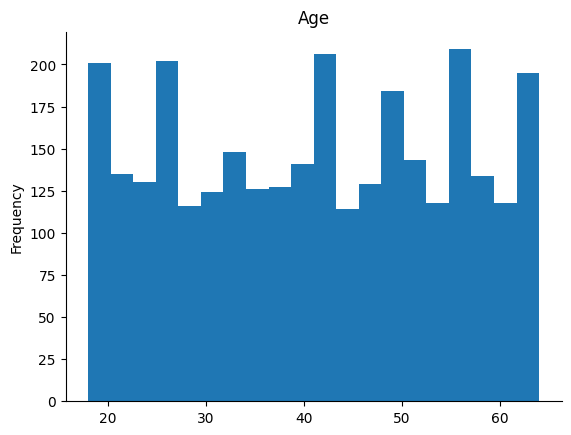

In [11]:
# @title Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

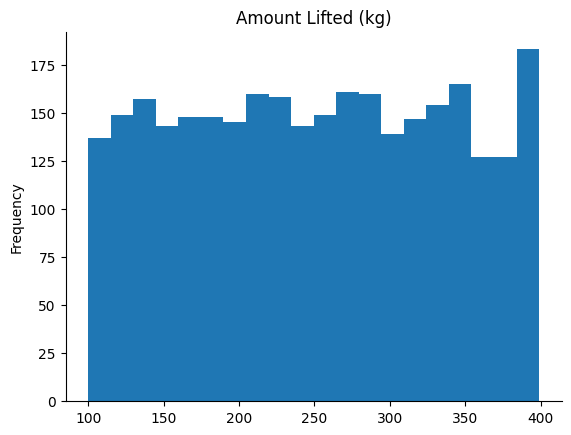

In [25]:
# @title Amount Lifted (kg)

from matplotlib import pyplot as plt
df['Amount Lifted (kg)'].plot(kind='hist', bins=20, title='Amount Lifted (kg)')
plt.gca().spines[['top', 'right',]].set_visible(False)

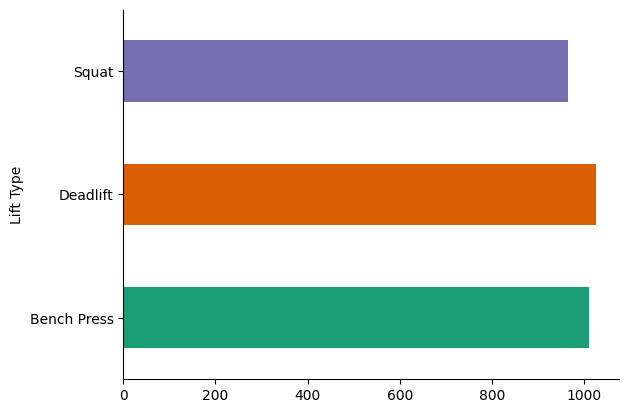

In [26]:
# @title Lift Type

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Lift Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

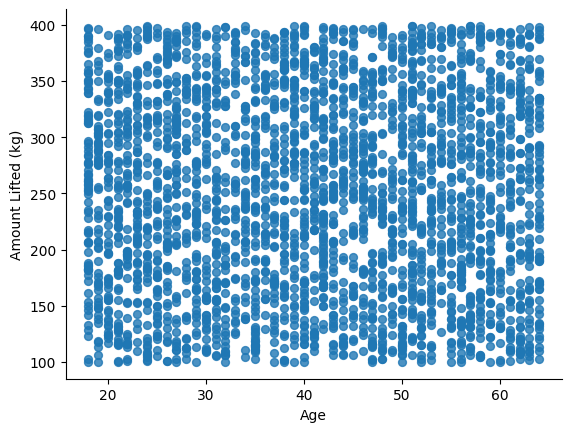

In [27]:
# @title Age vs Amount Lifted (kg)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='Amount Lifted (kg)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

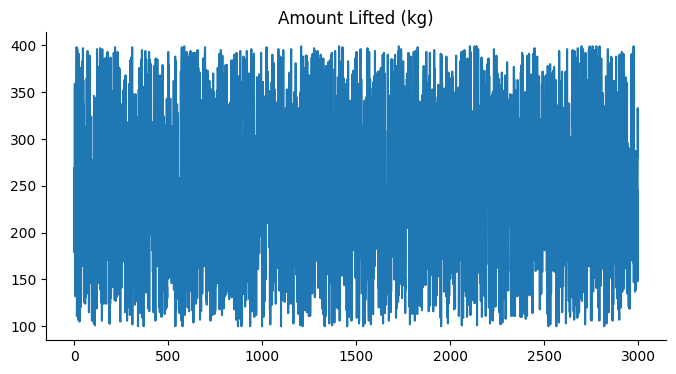

In [30]:
# @title Amount Lifted (kg)

from matplotlib import pyplot as plt
df['Amount Lifted (kg)'].plot(kind='line', figsize=(8, 4), title='Amount Lifted (kg)')
plt.gca().spines[['top', 'right']].set_visible(False)

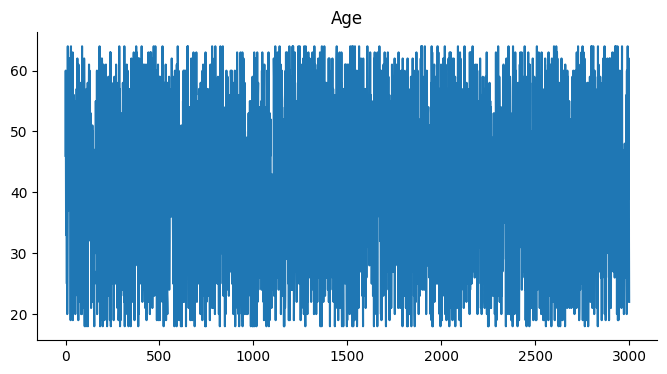

In [31]:
# @title Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

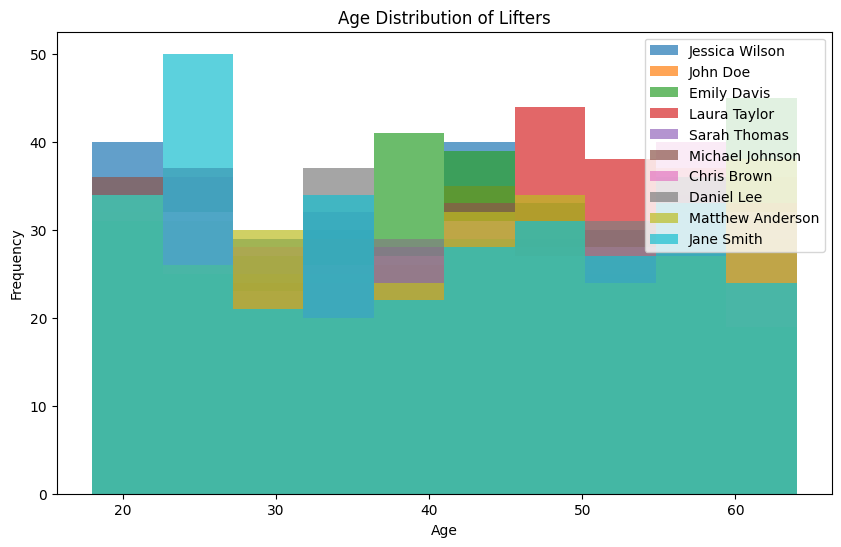

In [32]:
# @title Age Distribution of Lifters

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for lifter in df['Lifter Name'].unique():
    subset = df[df['Lifter Name'] == lifter]
    plt.hist(subset['Age'], label=lifter, alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Lifters')
_ = plt.legend()

<ipython-input-33-ab3721e35318>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Age', y='Lift Type', inner='box', palette='Dark2')


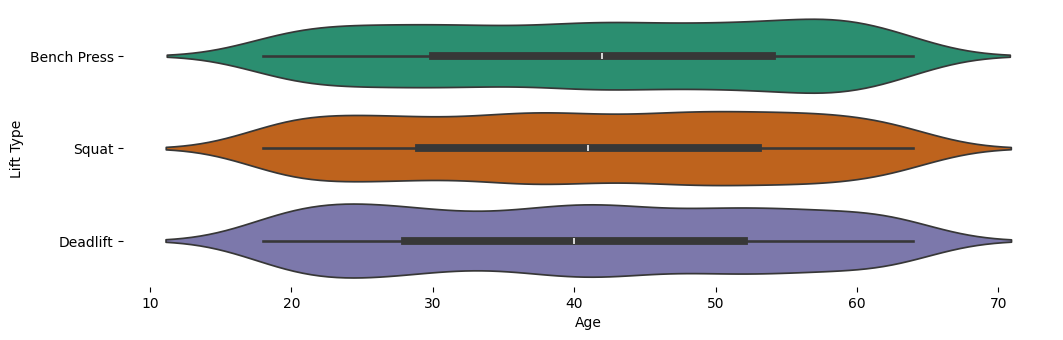

In [33]:
# @title Lift Type vs Age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Lift Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='Lift Type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-36-412ea48a54a6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Amount Lifted (kg)', y='Lift Type', inner='box', palette='Dark2')


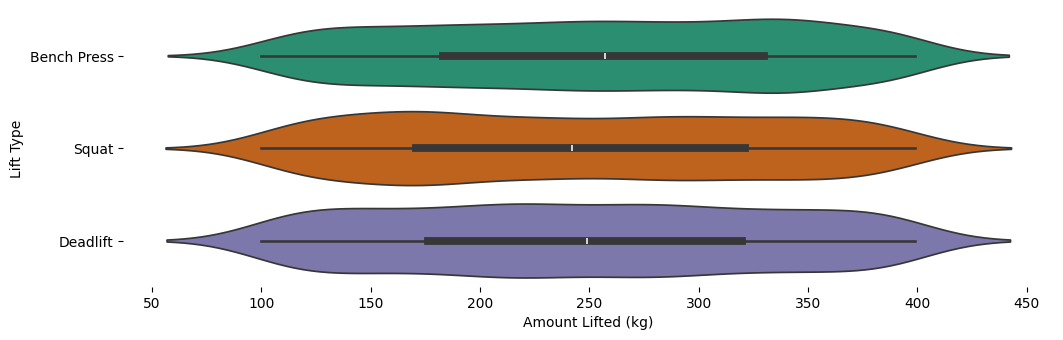

In [36]:
# @title Lift Type vs Amount Lifted (kg)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Lift Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Amount Lifted (kg)', y='Lift Type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

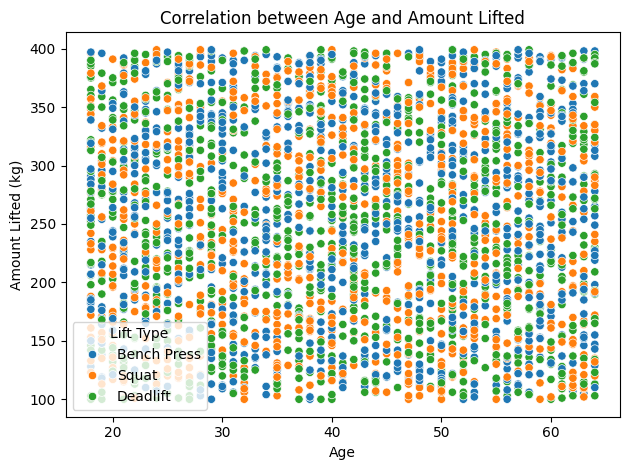

In [34]:
# @title Correlation between Age and Amount Lifted

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame

sns.scatterplot(x='Age', y='Amount Lifted (kg)', hue='Lift Type', data=df)
plt.xlabel('Age')
plt.ylabel('Amount Lifted (kg)')
plt.title('Correlation between Age and Amount Lifted')
_ = plt.tight_layout()

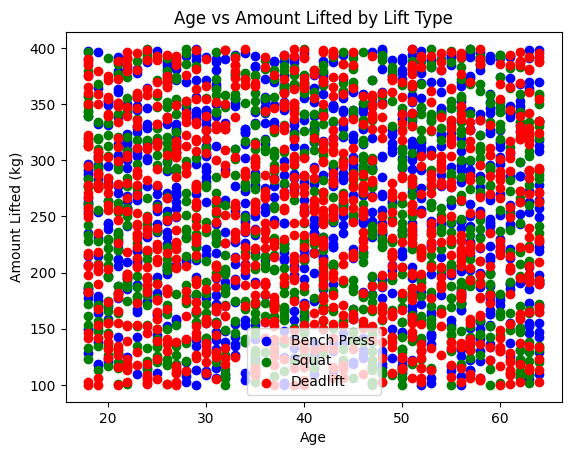

In [37]:
# @title Age vs Amount Lifted by Lift Type

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

colors = {'Bench Press': 'blue', 'Squat': 'green', 'Deadlift': 'red'}

for lift_type in df['Lift Type'].unique():
    subset = df[df['Lift Type'] == lift_type]
    plt.scatter(subset['Age'], subset['Amount Lifted (kg)'], label=lift_type, color=colors[lift_type])

plt.xlabel('Age')
plt.ylabel('Amount Lifted (kg)')
plt.title('Age vs Amount Lifted by Lift Type')
_ = plt.legend()

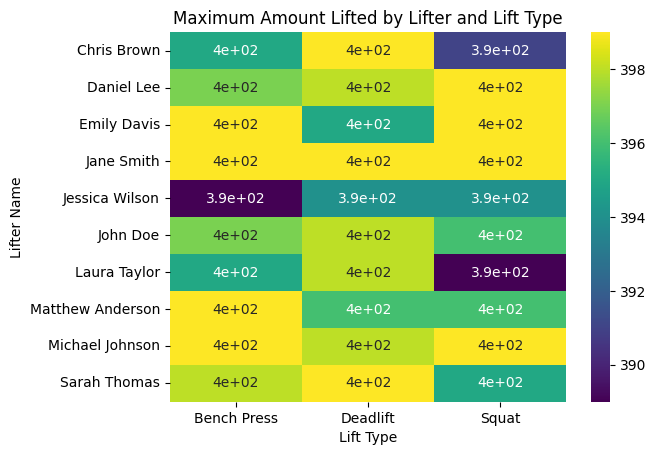

In [24]:
# @title Maximum Amount Lifted by Lifter and Lift Type

import matplotlib.pyplot as plt
import seaborn as sns

df_pivot = df.pivot_table(index='Lifter Name', columns='Lift Type', values='Amount Lifted (kg)', aggfunc='max')
sns.heatmap(df_pivot, annot=True, cmap='viridis')
plt.xlabel('Lift Type')
plt.ylabel('Lifter Name')
_ = plt.title('Maximum Amount Lifted by Lifter and Lift Type')